In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge





In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_excel('C:/Users/Equipo/Desktop/BIG DATA/TFM/WEMOB/MODELO/TOP1_OK.xlsx',index_col=0)

In [4]:
wemobDF = df.copy()

In [5]:
wemobDF.shape

(2541, 42)

In [6]:
wemobDF.columns

Index(['DCRUTA', 'CONDUCTOR', 'LATa', 'LONGa', 'LATc', 'LONGc', 'TMPa', 'TMPc',
       'MTR', 'COND', 'CS1', 'CS1hrssum', 'CS1hrsmean', 'CS1rept', 'CS2',
       'CS2hrssum', 'CS2hrsmean', 'CS2rept', 'CS3', 'CS3hrssum', 'CS3hrsmean',
       'CS3rept', 'ODOa', 'ODOc', 'ODOf', 'CTa', 'CTc', 'CTf', 'ALTf', 'VELCa',
       'HMf', 'CCf', 'TMa', 'RPMa', 'NFa', 'FRNf', 'TRa', 'PMf', 'PDLf',
       'EMBf', 'TIME_RUTA', 'TDsts'],
      dtype='object')

In [7]:
# De primeras nos quedamos con las variables finales que ya se ha ralizado el feature engineering
# Hay que meter CC -control crucero- y quizas horas motor la diferencia, frenadas la diferencia, pedal la diferencia
datos = wemobDF[['MTR', 'CONDUCTOR', 'CS1hrssum', 'CS1rept', 'CS2hrssum', 'CS2rept', 'HMf', 'ODOf', 'CTf', 'FRNf', 'PDLf', 
                 'EMBf', 'CCf', 'TIME_RUTA']]

In [8]:
datos.columns = ['Matricula', 'Conductor', 'TiempoParadaTotal', 'NumeroDeParadasTotal', 'TiempoRalenti', 
                 'NumeroDeParadasRalenti', 'HorasMotor', 'DistanciaRecorrida', 'ConsumoCombustible', 'Frenadas', 
                 'PedalAcelerador', 'Embrague', 'ControlCrucero','TIME_RUTA']

In [9]:
datos.isna().sum()

Matricula                 0
Conductor                 0
TiempoParadaTotal         0
NumeroDeParadasTotal      0
TiempoRalenti             0
NumeroDeParadasRalenti    0
HorasMotor                0
DistanciaRecorrida        0
ConsumoCombustible        0
Frenadas                  0
PedalAcelerador           0
Embrague                  0
ControlCrucero            0
TIME_RUTA                 0
dtype: int64

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2541 entries, 962 to 28331
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Matricula               2541 non-null   int64  
 1   Conductor               2541 non-null   int64  
 2   TiempoParadaTotal       2541 non-null   float64
 3   NumeroDeParadasTotal    2541 non-null   int64  
 4   TiempoRalenti           2541 non-null   float64
 5   NumeroDeParadasRalenti  2541 non-null   int64  
 6   HorasMotor              2541 non-null   int64  
 7   DistanciaRecorrida      2541 non-null   float64
 8   ConsumoCombustible      2541 non-null   float64
 9   Frenadas                2541 non-null   int64  
 10  PedalAcelerador         2541 non-null   int64  
 11  Embrague                2541 non-null   int64  
 12  ControlCrucero          2541 non-null   float64
 13  TIME_RUTA               2541 non-null   float64
dtypes: float64(6), int64(8)
memory usage:

In [11]:
datos.describe()

,Matricula,Conductor,TiempoParadaTotal,NumeroDeParadasTotal,TiempoRalenti,NumeroDeParadasRalenti,HorasMotor,DistanciaRecorrida,ConsumoCombustible,Frenadas,PedalAcelerador,Embrague,ControlCrucero,TIME_RUTA
count,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000
mean,64.924046,153.577725,0.689569,7.938213,1.313791,25.419520,7.151515,442.414829,141.233963,4.074380,78.443920,21.562377,0.003854,9.968636
std,34.997336,95.478966,1.467626,6.835621,1.430572,20.540672,8.145543,599.165585,194.118819,7.344582,90.620184,13683.046900,0.046333,9.639188
min,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,-226602.000000,0.000000,0.033333
25%,48.000000,79.000000,0.000000,2.000000,0.216667,7.000000,1.000000,4.505000,2.500000,0.000000,10.000000,65.000000,0.000000,1.885278
50%,65.000000,132.000000,0.219444,6.000000,0.930833,23.000000,3.000000,56.835000,19.000000,2.000000,47.000000,244.000000,0.000000,5.972778
75%,95.000000,242.000000,0.965000,12.000000,1.883333,38.000000,16.000000,1055.225000,333.000000,5.000000,116.000000,776.000000,0.001063,19.974444
max,124.000000,291.000000,48.150000,74.000000,15.596667,160.000000,75.000000,5560.945000,1792.000000,139.000000,1034.000000,207161.000000,1.000000,93.526111


### Outliers
Vamos a ver boxplot para detectar outliers

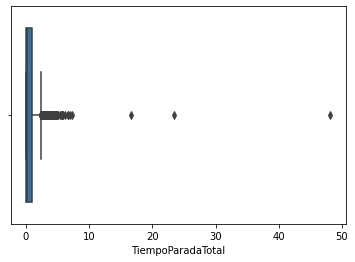

In [12]:
sns.boxplot(x=datos['TiempoParadaTotal'])

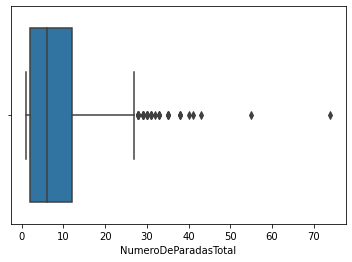

In [13]:
sns.boxplot(x=datos['NumeroDeParadasTotal'])

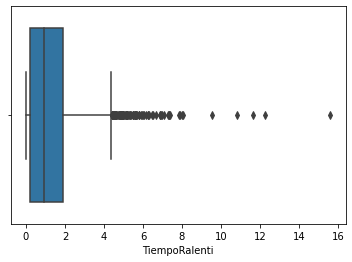

In [14]:
sns.boxplot(x=datos['TiempoRalenti'])

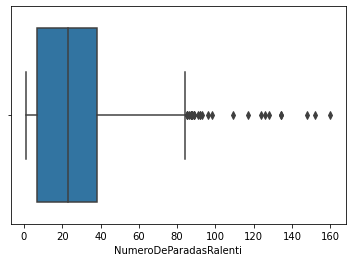

In [15]:
sns.boxplot(x=datos['NumeroDeParadasRalenti'])

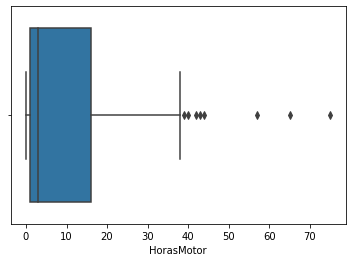

In [16]:
sns.boxplot(x=datos['HorasMotor'])

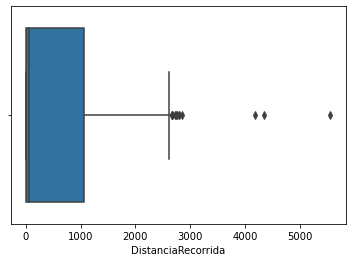

In [17]:
sns.boxplot(x=datos['DistanciaRecorrida'])

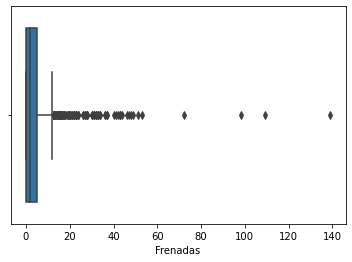

In [18]:
sns.boxplot(x=datos['Frenadas'])

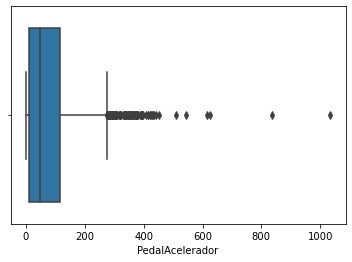

In [19]:
sns.boxplot(x=datos['PedalAcelerador'])

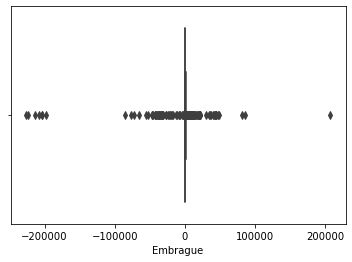

In [20]:
sns.boxplot(x=datos['Embrague'])

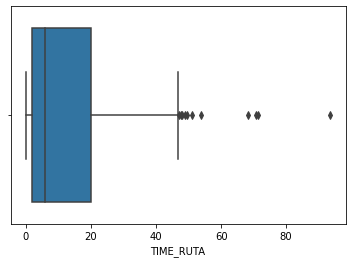

In [21]:
sns.boxplot(x=datos['TIME_RUTA'])

In [22]:
# Calculamos rango intercuartílico
Q1 = datos.quantile(0.25)
Q3 = datos.quantile(0.75)
IQR = Q3 - Q1
IQR

Matricula                   47.000000
Conductor                  163.000000
TiempoParadaTotal            0.965000
NumeroDeParadasTotal        10.000000
TiempoRalenti                1.666667
NumeroDeParadasRalenti      31.000000
HorasMotor                  15.000000
DistanciaRecorrida        1050.720000
ConsumoCombustible         330.500000
Frenadas                     5.000000
PedalAcelerador            106.000000
Embrague                   711.000000
ControlCrucero               0.001063
TIME_RUTA                   18.089167
dtype: float64

In [23]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit, upper_limit

(Matricula                  -22.500000
 Conductor                 -165.500000
 TiempoParadaTotal           -1.447500
 NumeroDeParadasTotal       -13.000000
 TiempoRalenti               -2.283333
 NumeroDeParadasRalenti     -39.500000
 HorasMotor                 -21.500000
 DistanciaRecorrida       -1571.575000
 ConsumoCombustible        -493.250000
 Frenadas                    -7.500000
 PedalAcelerador           -149.000000
 Embrague                 -1001.500000
 ControlCrucero              -0.001594
 TIME_RUTA                  -25.248472
 dtype: float64,
 Matricula                  165.500000
 Conductor                  486.500000
 TiempoParadaTotal            2.412500
 NumeroDeParadasTotal        27.000000
 TiempoRalenti                4.383333
 NumeroDeParadasRalenti      84.500000
 HorasMotor                  38.500000
 DistanciaRecorrida        2631.305000
 ConsumoCombustible         828.750000
 Frenadas                    12.500000
 PedalAcelerador            275.000000
 Embragu

In [24]:
datos = datos[~((datos < (Q1 - 1.5 * IQR)) | (datos > (Q3 + 1.5 * IQR))).any(axis=1)]
datos.shape

(1752, 14)

### VARIABLE OBJETIVO

In [25]:
#Obtenemos la información estadistica de la variable objetivo.
datos [ 'ConsumoCombustible' ] . describe()

count    1752.000000
mean       69.901826
std       140.104860
min         0.000000
25%         1.000000
50%         7.500000
75%        28.125000
max       574.000000
Name: ConsumoCombustible, dtype: float64

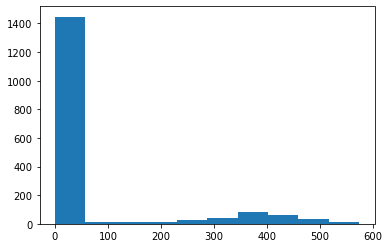

In [26]:
# Distribución variable objetivo, esta variable podríamos hacerla binaria por la distribución que tiene
# pero solo temdríamos 2 clases de consumo y queremos 4 clases, y hemos eliminado ya los outliers por 1.5 su rango intercuartílico
plt.hist(datos['ConsumoCombustible'])
plt.show()

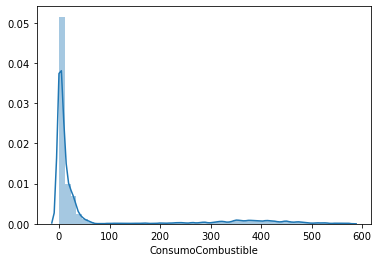

In [27]:
from seaborn  import distplot
distplot(datos.ConsumoCombustible)

In [28]:
from sklearn.preprocessing import KBinsDiscretizer

datos['ConsumoCombustible'] = KBinsDiscretizer(n_bins=4, encode='ordinal',
                           strategy = "quantile").fit_transform(datos[['ConsumoCombustible']])

In [29]:
datos['ConsumoCombustible']

NRUTA
962      1.0
991      2.0
992      1.0
993      2.0
995      1.0
        ... 
27544    2.0
27545    1.0
27577    0.0
28327    3.0
28329    3.0
Name: ConsumoCombustible, Length: 1752, dtype: float64

In [30]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752 entries, 962 to 28329
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Matricula               1752 non-null   int64  
 1   Conductor               1752 non-null   int64  
 2   TiempoParadaTotal       1752 non-null   float64
 3   NumeroDeParadasTotal    1752 non-null   int64  
 4   TiempoRalenti           1752 non-null   float64
 5   NumeroDeParadasRalenti  1752 non-null   int64  
 6   HorasMotor              1752 non-null   int64  
 7   DistanciaRecorrida      1752 non-null   float64
 8   ConsumoCombustible      1752 non-null   float64
 9   Frenadas                1752 non-null   int64  
 10  PedalAcelerador         1752 non-null   int64  
 11  Embrague                1752 non-null   int64  
 12  ControlCrucero          1752 non-null   float64
 13  TIME_RUTA               1752 non-null   float64
dtypes: float64(6), int64(8)
memory usage:

In [31]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752 entries, 962 to 28329
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Matricula               1752 non-null   int64  
 1   Conductor               1752 non-null   int64  
 2   TiempoParadaTotal       1752 non-null   float64
 3   NumeroDeParadasTotal    1752 non-null   int64  
 4   TiempoRalenti           1752 non-null   float64
 5   NumeroDeParadasRalenti  1752 non-null   int64  
 6   HorasMotor              1752 non-null   int64  
 7   DistanciaRecorrida      1752 non-null   float64
 8   ConsumoCombustible      1752 non-null   float64
 9   Frenadas                1752 non-null   int64  
 10  PedalAcelerador         1752 non-null   int64  
 11  Embrague                1752 non-null   int64  
 12  ControlCrucero          1752 non-null   float64
 13  TIME_RUTA               1752 non-null   float64
dtypes: float64(6), int64(8)
memory usage:

### Estudio de variables y correlación

C:\Users\Equipo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


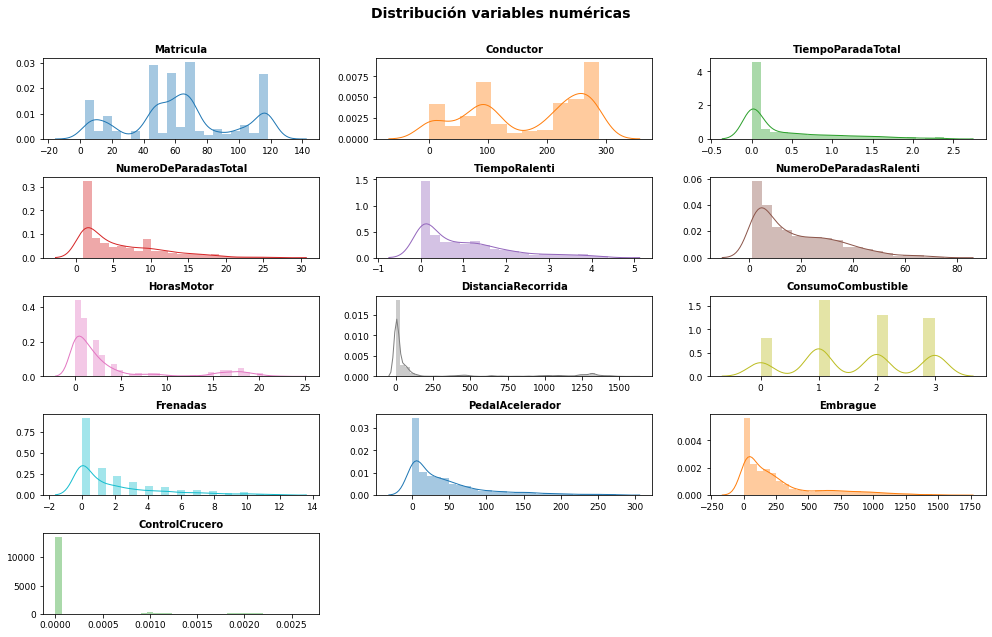

In [32]:
# Gráfico de distribución para cada variable numérica
#-------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(14, 9))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int64']).columns
#columnas_numeric = columnas_numeric.drop('ConsumoCombustible')

for i, colum in enumerate(columnas_numeric):
    sns.distplot(
        datos[colum],
        hist    = True,
        rug     = False,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        kde_kws = {'shade': False, 'linewidth': 1},
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize =9)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 14, fontweight = "bold");

# Se eliminan los axes vacíos
fig.delaxes(axes[13])
fig.delaxes(axes[14])

### Variable objetivo
Estudio **variable objetivo** frente a resto de variables, observamos que la mayoría tienen correlación.

C:\Users\Equipo\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


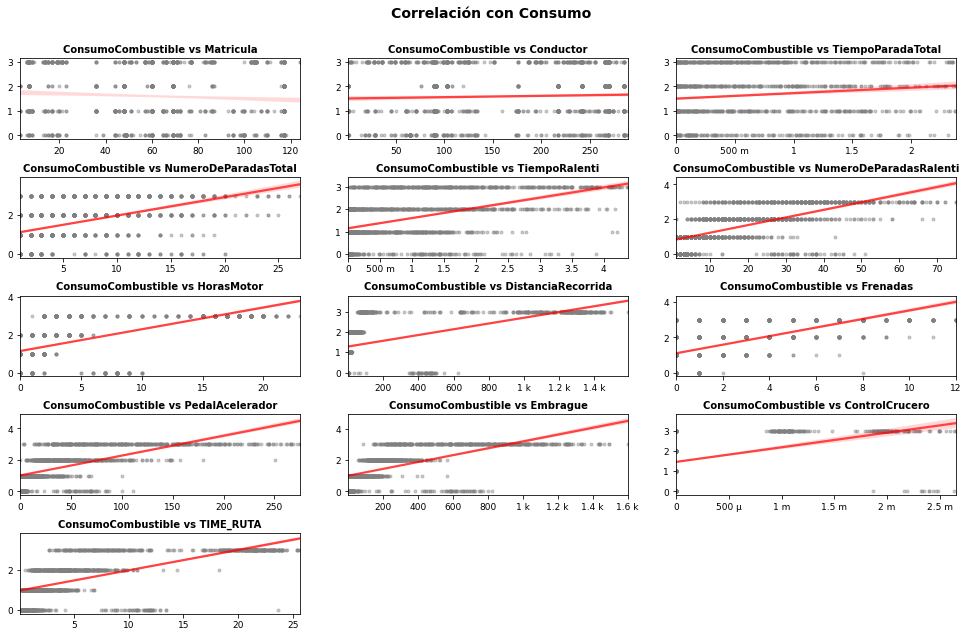

In [33]:
# Gráfico de distribución para cada variable numérica
#-------------------------------------------------------------------------------
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(14, 9))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop('ConsumoCombustible')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['ConsumoCombustible'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ConsumoCombustible vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

   
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Consumo', fontsize = 14, fontweight = "bold");


# Se eliminan los axes vacíos
fig.delaxes(axes[13])
fig.delaxes(axes[14])

In [34]:
corr = abs(datos.corr())
corr[['ConsumoCombustible']].sort_values(by = 'ConsumoCombustible',ascending = False).style.background_gradient()

,ConsumoCombustible
ConsumoCombustible,1.000000
TIME_RUTA,0.679007
PedalAcelerador,0.677681
Embrague,0.671681
NumeroDeParadasRalenti,0.670323
HorasMotor,0.649466
Frenadas,0.645644
DistanciaRecorrida,0.587683
NumeroDeParadasTotal,0.485028
TiempoRalenti,0.459034


In [35]:
# Correlación entre columnas numéricas
# ------------------------------------------------------------------------------

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
104,DistanciaRecorrida,HorasMotor,0.974929,0.974929
91,HorasMotor,DistanciaRecorrida,0.974929,0.974929
188,TIME_RUTA,HorasMotor,0.972544,0.972544
97,HorasMotor,TIME_RUTA,0.972544,0.972544
189,TIME_RUTA,DistanciaRecorrida,0.945333,0.945333
111,DistanciaRecorrida,TIME_RUTA,0.945333,0.945333
193,TIME_RUTA,Embrague,0.933860,0.933860
167,Embrague,TIME_RUTA,0.933860,0.933860
160,Embrague,HorasMotor,0.923203,0.923203
95,HorasMotor,Embrague,0.923203,0.923203


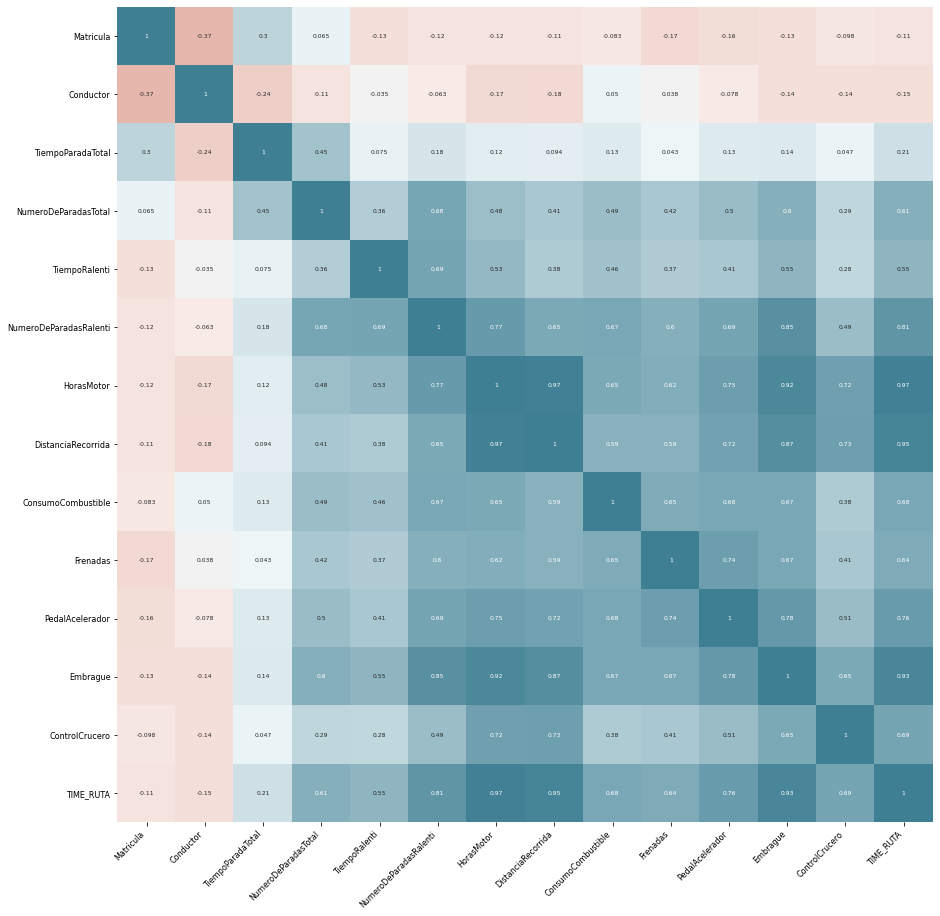

In [36]:
# Heatmap matriz de correlaciones
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

Para ello utilizaremos un proceso automatico, que eliminara la variable con mayor **VIF** nos indicara cuales son las la variables que son las optimas para nuestro modelo ya que las elimina por la correlación con la variable objetivo. Vemos que saca HorasMotor, DistanciaRecorrida y TIME_Ruta, como ya adelantaba el análisis de correlación y la matriz de correlación.

In [37]:
from sklearn.linear_model import LinearRegression

def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result

datos_vif = datos.copy(deep = True)
features = list(datos_vif.columns)
features.remove('ConsumoCombustible')
datos_vif = datos_vif[features]

calculateVIF(datos_vif)

,Matricula,Conductor,TiempoParadaTotal,NumeroDeParadasTotal,TiempoRalenti,NumeroDeParadasRalenti,HorasMotor,DistanciaRecorrida,Frenadas,PedalAcelerador,Embrague,ControlCrucero,TIME_RUTA
VIF,1.346775,1.308297,1.591798,3.692811,3.479341,8.431325,87.381435,77.211352,2.440932,3.433814,11.713444,2.176071,50.918666


In [38]:
datos_vif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752 entries, 962 to 28329
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Matricula               1752 non-null   int64  
 1   Conductor               1752 non-null   int64  
 2   TiempoParadaTotal       1752 non-null   float64
 3   NumeroDeParadasTotal    1752 non-null   int64  
 4   TiempoRalenti           1752 non-null   float64
 5   NumeroDeParadasRalenti  1752 non-null   int64  
 6   HorasMotor              1752 non-null   int64  
 7   DistanciaRecorrida      1752 non-null   float64
 8   Frenadas                1752 non-null   int64  
 9   PedalAcelerador         1752 non-null   int64  
 10  Embrague                1752 non-null   int64  
 11  ControlCrucero          1752 non-null   float64
 12  TIME_RUTA               1752 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 191.6 KB


In [39]:
def selectDataUsingVIF(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.values.max() > max_VIF:
        col_max = np.where(VIF == VIF.values.max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result


result = selectDataUsingVIF(datos_vif)

calculateVIF(selectDataUsingVIF(datos_vif))


,Matricula,Conductor,TiempoParadaTotal,NumeroDeParadasTotal,TiempoRalenti,DistanciaRecorrida,Frenadas,PedalAcelerador,ControlCrucero
VIF,1.323115,1.272868,1.418386,1.777981,1.296966,3.441806,2.37353,3.260933,2.162889


In [40]:
result.columns

Index(['Matricula', 'Conductor', 'TiempoParadaTotal', 'NumeroDeParadasTotal',
       'TiempoRalenti', 'DistanciaRecorrida', 'Frenadas', 'PedalAcelerador',
       'ControlCrucero'],
      dtype='object')

In [41]:
datos.describe()

,Matricula,Conductor,TiempoParadaTotal,NumeroDeParadasTotal,TiempoRalenti,NumeroDeParadasRalenti,HorasMotor,DistanciaRecorrida,ConsumoCombustible,Frenadas,PedalAcelerador,Embrague,ControlCrucero,TIME_RUTA
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,63.369863,163.062785,0.418474,5.931507,0.980078,18.429795,3.993721,221.499903,1.597603,2.037100,46.300228,275.457763,0.000188,6.054263
std,33.086860,96.481040,0.588328,5.273111,1.041250,15.809860,5.854652,430.019668,1.032678,2.748821,55.500918,317.865519,0.000547,6.884162
min,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033333
25%,48.000000,89.000000,0.000000,2.000000,0.100000,5.000000,0.000000,1.541250,1.000000,0.000000,4.750000,42.000000,0.000000,1.289653
50%,60.000000,187.000000,0.084444,4.000000,0.650000,14.000000,1.000000,14.632500,2.000000,1.000000,27.000000,159.000000,0.000000,3.404028
75%,83.000000,255.000000,0.688681,9.000000,1.518542,29.000000,4.000000,88.545000,2.250000,3.000000,64.000000,353.250000,0.000000,7.464306
max,124.000000,289.000000,2.382222,27.000000,4.380556,75.000000,23.000000,1590.370000,3.000000,12.000000,275.000000,1602.000000,0.002656,25.661944


In [42]:
# Cogemos las variables resultantes en VIF y son las que utilizamos para el modelo
columnas = list(result.columns)
y= datos['ConsumoCombustible']
X = datos[columnas]

In [43]:
y

NRUTA
962      1.0
991      2.0
992      1.0
993      2.0
995      1.0
        ... 
27544    2.0
27545    1.0
27577    0.0
28327    3.0
28329    3.0
Name: ConsumoCombustible, Length: 1752, dtype: float64

In [44]:
datos

,Matricula,Conductor,TiempoParadaTotal,NumeroDeParadasTotal,TiempoRalenti,NumeroDeParadasRalenti,HorasMotor,DistanciaRecorrida,ConsumoCombustible,Frenadas,PedalAcelerador,Embrague,ControlCrucero,TIME_RUTA
NRUTA,,,,,,,,,,,,,,
962,3,174,0.612222,5,0.100000,3,1,1.610,1.0,0,9,68,0.0,1.526111
991,3,91,1.457222,1,0.950000,24,3,38.200,2.0,0,57,202,0.0,3.731389
992,3,91,0.070556,3,0.216667,7,0,8.590,1.0,1,30,88,0.0,0.751389
993,3,91,1.245000,1,0.183333,11,1,32.760,2.0,2,46,137,0.0,2.328333
995,3,91,0.000000,1,2.115556,7,0,1.290,1.0,0,1,36,0.0,2.298889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27544,117,1,2.358056,11,0.696667,13,2,55.880,2.0,3,102,229,0.0,5.043611
27545,117,1,0.066667,1,2.083333,10,2,2.650,1.0,0,13,50,0.0,2.492222
27577,118,91,0.000000,4,0.483333,37,2,68.085,0.0,8,111,250,0.0,4.120278


## Modelos
### Conjuntos de Train y Test

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X ,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state= 45,
                                                    stratify = y)

In [46]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier### MODELO
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import chi2 

C:\Users\Equipo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


### Regresión Logística

In [47]:
modelo_1 = LogisticRegression(random_state = 111).fit(X_train, y_train)

#regressor.predict([[x_test]])

C:\Users\Equipo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
y_pred = modelo_1.predict(X_test)

In [49]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2, average = "weighted"))
    print('recall')
    print(recall_score(y1, y2, average = "weighted"))
    print('f1')
    print(f1_score(y1, y2, average = "weighted"))
    # No pintamos curva ROC ya que es solo para clasificaci
    #false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    #roc_auc = auc(false_positive_rate, recall)
    #print('AUC')
    #print(roc_auc)
    #plt.plot(false_positive_rate, recall, 'b')
    #plt.plot([0, 1], [0, 1], 'r--')
    #plt.title('AUC = %0.2f' % roc_auc)

In [50]:
saca_metricas(y_test, y_pred)

matriz de confusión
[[  1  45   0  11]
 [  0 105  10   0]
 [  5   8  72   6]
 [  4   0  14  70]]
accuracy
0.7065527065527065
precision
0.6301385992423385
recall
0.7065527065527065
f1
0.6570880265214026


#### Score del modelo y  Validación Cruzada con su media y desviación estandar para modelo_1 Regresión Logística

In [51]:
modelo_1.score(X, y)

0.6786529680365296

In [52]:
results_1 = cross_val_score(estimator=modelo_1, X=X_train, y=y_train, cv=5)

C:\Users\Equipo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Equipo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

In [53]:
results_1

array([0.71174377, 0.675     , 0.66071429, 0.66428571, 0.63214286])

In [54]:
print("La media de resultados de validación cruzada 5 es de : " + str(results_1.mean()))

La media de resultados de validación cruzada 5 es de : 0.66877732587697


In [55]:
print("La desviación estándar de resultados de validación cruzada 5 es de : " + str(results_1.std()))

La desviación estándar de resultados de validación cruzada 5 es de : 0.025737554962592217


###  Árbol de decisión

In [56]:
modelo_2 = DecisionTreeClassifier(random_state = 222).fit(X_train, y_train)
y_pred        = modelo_2.predict(X_test)

In [57]:
saca_metricas(y_test, y_pred)

matriz de confusión
[[45 12  0  0]
 [19 88  8  0]
 [ 1  4 83  3]
 [ 0  0  6 82]]
accuracy
0.8490028490028491
precision
0.8533599082556492
recall
0.8490028490028491
f1
0.8496931646717266


####  Score del modelo y  Validación Cruzada con su media y desviación estandar para modelo_2  Árbol de decisión

In [58]:
modelo_2.score(X, y)

0.9697488584474886

In [59]:
results_2 = cross_val_score(estimator=modelo_2, X=X_train, y=y_train, cv=5)

In [60]:
results_2

array([0.81494662, 0.87857143, 0.86785714, 0.85      , 0.80714286])

In [61]:
print("La media de resultados de validación cruzada 5 es de : " + str(results_2.mean()))

La media de resultados de validación cruzada 5 es de : 0.8437036095577021


In [62]:
print("La desviación estándar de resultados de validación cruzada 5 es de : " + str(results_2.std()))

La desviación estándar de resultados de validación cruzada 5 es de : 0.02829295183190737


### Ramdon Forest

In [63]:
modelo_3 = RandomForestClassifier(random_state = 333).fit(X_train, y_train)
y_pred        = modelo_3.predict(X_test)

In [64]:
saca_metricas(y_test, y_pred)

matriz de confusión
[[43 14  0  0]
 [11 99  5  0]
 [ 0  2 86  3]
 [ 0  0  8 80]]
accuracy
0.8774928774928775
precision
0.878229832045093
recall
0.8774928774928775
f1
0.8771518256898373


####  Score del modelo y  Validación Cruzada con su media y desviación estandar para modelo_3  Ramdon Forest

In [65]:
modelo_3.score(X, y)

0.9754566210045662

In [66]:
results_3 = cross_val_score(estimator=modelo_3, X=X_train, y=y_train, cv=5)

In [67]:
results_3

array([0.886121  , 0.90357143, 0.88571429, 0.87142857, 0.84642857])

In [68]:
print("La media de resultados de validación cruzada 5 es de : " + str(results_3.mean()))

La media de resultados de validación cruzada 5 es de : 0.8786527707168276


In [69]:
print("La desviación estándar de resultados de validación cruzada 5 es de : " + str(results_3.std()))

La desviación estándar de resultados de validación cruzada 5 es de : 0.019063929153934


Vamos a probar cambiando profundidad 

In [70]:
modelo_4 = RandomForestClassifier(max_depth = 12, random_state = 444).fit(X_train, y_train)
y_pred        = modelo_4.predict(X_test)

In [71]:
saca_metricas(y_test, y_pred)

matriz de confusión
[[ 40  16   0   1]
 [  9 103   3   0]
 [  0   2  86   3]
 [  0   0   8  80]]
accuracy
0.8803418803418803
precision
0.8800943316496491
recall
0.8803418803418803
f1
0.8789629861024129


#### Score  del modelo y  Validación Cruzada con su media y desviación estandar para modelo_4  Ramdon Forest con profundidad 12

In [72]:
modelo_4.score(X, y)

0.976027397260274

In [73]:
results_4 = cross_val_score(estimator=modelo_4, X=X_train, y=y_train, cv=5)


In [74]:
results_4

array([0.86476868, 0.88571429, 0.88928571, 0.85714286, 0.86071429])

In [75]:
print("La media de resultados de validación cruzada 5 es de : " + str(results_4.mean()))

La media de resultados de validación cruzada 5 es de : 0.8715251652262328


In [76]:
print("La desviación estándar de resultados de validación cruzada 5 es de : " + str(results_4.std()))

La desviación estándar de resultados de validación cruzada 5 es de : 0.013312732199787226


### SVC

In [77]:
from sklearn.svm import SVC
modelo_5 = SVC(random_state = 555).fit(X_train, y_train)
y_pred         = modelo_5.predict(X_test)



In [78]:
saca_metricas(y_test, y_pred)

matriz de confusión
[[ 12  45   0   0]
 [  0 112   3   0]
 [  0  19  72   0]
 [  1   0  16  71]]
accuracy
0.7606837606837606
precision
0.8142370450062757
recall
0.7606837606837606
f1
0.7369127888352424


#### Score  del modelo y  Validación Cruzada con su media y desviación estandar para modelo_5 SVC

In [79]:
modelo_5.score(X, y)

0.7505707762557078

In [80]:
results_5 = cross_val_score(estimator=modelo_5, X=X_train, y=y_train, cv=5)

In [81]:
results_5

array([0.74733096, 0.76071429, 0.73571429, 0.75357143, 0.69642857])

In [82]:
print("La media de resultados de validación cruzada 5 es de : " + str(results_5.mean()))

La media de resultados de validación cruzada 5 es de : 0.7387519064565329


In [83]:
print("La desviación estándar de resultados de validación cruzada 5 es de : " + str(results_5.std()))

La desviación estándar de resultados de validación cruzada 5 es de : 0.022698265750467995


### XGBoost

In [84]:
modelo_6 = XGBClassifier(random_state = 666).fit(X_train, y_train)
y_pred   = modelo_6.predict(X_test)

In [85]:
saca_metricas(y_test, y_pred)

matriz de confusión
[[ 45  12   0   0]
 [  8 101   6   0]
 [  0   2  85   4]
 [  0   0   7  81]]
accuracy
0.8888888888888888
precision
0.8894120267039246
recall
0.8888888888888888
f1
0.888583589075989


#### Score  del modelo y  Validación Cruzada con su media y desviación estandar para modelo_6  XGBoost

In [86]:
modelo_6.score(X, y)

0.9777397260273972

In [87]:
results_6 = cross_val_score(estimator=modelo_6, X=X_train, y=y_train, cv=5)

In [88]:
results_6

array([0.87900356, 0.88928571, 0.90357143, 0.87857143, 0.84285714])

In [89]:
print("La media de resultados de validación cruzada 5 es de : " + str(results_6.mean()))

La media de resultados de validación cruzada 5 es de : 0.8786578546009152


In [90]:
print("La desviación estándar de resultados de validación cruzada 5 es de : " + str(results_6.std()))

La desviación estándar de resultados de validación cruzada 5 es de : 0.020077128836666038


Una vez realizados los modelos y habiendo comparado sus métricas,vemos que el modelo_6 **XGBoost** y el modelo_4 **RandomForest** con profundidad 12, son los que mejores métricas tienen, en ambos casos muy parecidas. En el resto de modelos también hemos tenido buenas métricas aunque algo inferiores, excepto modelo_1 **Regresión Logística** y modelo_5 **SVC** que da las peores. 

También hemos realizado validación cruzada para determinar cómo de bueno será el modelo y si existiese sobreajuste de este sobre un conjunto de entrenamiento dado, además nos muestra una varianza muy baja pese a entrenarse 5 veces con 5 subsets random, lo que nos indica que no ha sido una predicción casual y que no existe sobrea ajuste del modelo.

Por lo tanto continuamos con el modelo_6 **XGBoost**.

Recordemos la información que nos aportan las métricas, **accuracy** mide el porcentaje de casos que el modelo ha acertado, en nuestro caso nos podemos fíar ya que hemos balanceado la variable predictora **y** al crear el conjunto con stratify = y,  **precision** mide la calidad del modelo, en tarea de clasificación, en nuestro caso significa que el modelo acertará casi un 89% de las veces cuando prediga en que rango estará el consumo de combustible, **recall**, también conocido como Tasa de verdaderos positivos, nos informa sobre la proporción de casos positivos que fueron correctamente identificados por el modelo, practicamente 9 de cada 10,  **f1** combina **precision** y **recall** en una sola medida.

#### Selección de variables

#### Ánalisis univariante

In [91]:
# 5 variables
S_chi5 = SelectKBest(chi2, k = 5).fit(X_train,y_train)
_X_train_= S_chi5.transform(X_train)
_X_test_= S_chi5.transform(X_test)
print ("Listado de variables ", np.asarray(list(X))[S_chi5.get_support()])

Listado de variables  ['Conductor' 'NumeroDeParadasTotal' 'DistanciaRecorrida' 'Frenadas'
 'PedalAcelerador']


In [92]:
# 9 variables, son todaas las del modelo, no tiene mucho sentido
S_chi9 = SelectKBest(chi2, k = 9).fit(X_train,y_train)
_X_train_= S_chi9.transform(X_train)
_X_test_= S_chi9.transform(X_test)
print ("Listado de variables ", np.asarray(list(X))[S_chi9.get_support()])

Listado de variables  ['Matricula' 'Conductor' 'TiempoParadaTotal' 'NumeroDeParadasTotal'
 'TiempoRalenti' 'DistanciaRecorrida' 'Frenadas' 'PedalAcelerador'
 'ControlCrucero']


#### Fordward Stepwise

Nos va introduciendo las variables de mayor correlación con la objetivo.

In [93]:
model         = XGBClassifier()
features      = list(X.columns)
feature_order = []
feature_error = []

for i in range(len(features)):
    idx_try = [val for val in range(len(features)) if val not in feature_order]
    iter_error = []

    for i_try in idx_try:
        useRow = feature_order[:]
        useRow.append(i_try)

        use_train = X_train[X_train.columns[useRow]]
        use_test = X_test[X_train.columns[useRow]]

        model.fit(use_train, y_train)
        rmsError = np.linalg.norm((y_test - model.predict(use_test)), 2)/np.sqrt(len(y_test))
        iter_error.append(rmsError)

    pos_best = np.argmin(iter_error)
    feature_order.append(idx_try[pos_best])
    feature_error.append(iter_error[pos_best])

for i in range(len(features)):
    print ("En el paso", i, "se ha insertado la variable", features[feature_order[i]], "con un error", feature_error[i])

En el paso 0 se ha insertado la variable DistanciaRecorrida con un error 0.5547001962252291
En el paso 1 se ha insertado la variable Conductor con un error 0.4202834479707435
En el paso 2 se ha insertado la variable TiempoRalenti con un error 0.36592777142919053
En el paso 3 se ha insertado la variable PedalAcelerador con un error 0.31123318728261756
En el paso 4 se ha insertado la variable Matricula con un error 0.3066220703359333
En el paso 5 se ha insertado la variable ControlCrucero con un error 0.3066220703359333
En el paso 6 se ha insertado la variable Frenadas con un error 0.31577697781044733
En el paso 7 se ha insertado la variable TiempoParadaTotal con un error 0.32467384467047145
En el paso 8 se ha insertado la variable NumeroDeParadasTotal con un error 0.31123318728261756


In [94]:
datos_5var = datos[['Conductor', 'NumeroDeParadasTotal', 'DistanciaRecorrida', 'Frenadas', 'PedalAcelerador']]

Creamos el test con las mejores 5 variables

X_test_analisis = datos_5var

Creamos el train con las mejores 5 variables

X_train_analisis = datos_5var

In [95]:
# Creamos de nuevo train y tes con las 5 variables más importantes
X_train, X_test, y_train, y_test = train_test_split(datos_5var, y, test_size = 0.2,random_state=42, stratify = y)

In [96]:
# creamos  el modelnadoro c con laslen mayor importancia sobre este
modelo_6_5var = XGBClassifier().fit(X_train, y_train)
y_pred        = modelo_6_5var.predict(X_test)
saca_metricas(y_test, y_pred)

matriz de confusión
[[40 15  1  1]
 [14 94  7  0]
 [ 0 13 74  4]
 [ 0  0  6 82]]
accuracy
0.8262108262108262
precision
0.8270485344946749
recall
0.8262108262108262
f1
0.8262493010408056


In [97]:
modelo_6_5var.score(datos_5var, y)

0.9646118721461188

In [98]:
results_6_5var = cross_val_score(estimator = modelo_6_5var, X = X_train, y = y_train, cv = 5)

In [99]:
results_6_5var

array([0.78647687, 0.825     , 0.83928571, 0.81785714, 0.825     ])

In [100]:
print("La media de resultados de validación cruzada 5 es de : " + str(results_6_5var.mean()))

La media de resultados de validación cruzada 5 es de : 0.8187239450940519


In [101]:
print("La desviación estándar de resultados de validación cruzada 5 es de : " + str(results_6_5var.std()))

La desviación estándar de resultados de validación cruzada 5 es de : 0.017562399544300653


####  GridSearch de parámetros para modelado de modelo XGBoost

Nos mostrara como ajustar, valores óptimos los parametros propios del modelo para obtener el mejor resultado.

In [102]:
parametros = {'nthread':[4], 
              'objective':['binary:logistic'],
              'learning_rate': [0.05], 
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [100, 200, 500, 700, 1000], 
                           'seed': [1337]}

In [103]:
# Aplicar el grid sobre el modelo, el scoring debemos cambiar a f1_micro por ser multiclase:
modelo_grid = GridSearchCV(modelo_6_5var,
                     parametros,
                     scoring='f1_micro',
                     cv=5,
                     verbose=2, refit=True)

In [104]:
# Aplicamos los mejores resultados del grid sobre el data train:
modelo_grid.fit(datos_5var, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[13:56:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[13:56:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[13:56:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_chi

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=500, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   1.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=500, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[13:57:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=500, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   1.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_chi

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=1000, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   2.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=1000, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[13:57:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=1000, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   2.1s
[13:57:24] WARNING: C:\Users\Administrator\workspace\xgboost-win

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   28.0s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel...
                                     scale_pos_weight=None, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             param_grid={'colsample_b

In [105]:
print(modelo_grid.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'n_estimators': 500, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}


In [106]:
print(modelo_grid.best_score_)

0.8081986161986162


#### Generamos predicciones sobre test

In [107]:
best_param_modelo_6_5var = XGBClassifier(colsample_bytree= 0.7, 
                                         learning_rate= 0.05, 
                                         max_depth= 6, 
                                         min_child_weight= 11, 
                                         n_estimators= 500, 
                                         nthread= 4, 
                                         objective= 'binary:logistic', 
                                         seed= 1337, 
                                         silent= 1, 
                                         subsample= 0.8).fit(X_train, y_train)
y_pred        = best_param_modelo_6_5var.predict(X_test)
saca_metricas(y_test, y_pred)

[13:57:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


matriz de confusión
[[44 12  1  0]
 [11 97  7  0]
 [ 0 11 78  2]
 [ 0  0  5 83]]
accuracy
0.8603988603988604
precision
0.8617884475727613
recall
0.8603988603988604
f1
0.8608580936092928


El parámetro silent = 1, en la primera ejecución nos arroja un mensaje advirtiendonos de no utilizarlo, por lo que finalmente aparece comentado

### Conclusión

Faltaría utilizar el el modelo sobre datos nuevos para  que nos dijese la probabilidad del consumo de combustible, donde se situaría en las 4 clases que tenemos en la variable objbetivo.

Para esto generaríamos la predicción sobre datos nuevos, utilizando **predict_proba**.